#이미지란
##이미지 : (Width, Height, Channal)인 랭크가 3인 텐서
Width: 이미지의 가로 크기

Height: 이미지의 세로 크기

Channal: RGB 생고 담당 (컬러3, 흑백1)

*픽셀: (가로,세로,채널)텐서의 하나의 원소, 0~255까지 256의 정수로 구성

    ex) 1. (1600,0)부분의 검은색, 2. (900,400)부분의 파란색

    컬러사진: 1:(1600,0,[R:0,G:0,B:0]),  2:(900,400,[R:0,G:0,B:255])
    흑백사진: 1:(1600,0,0),  2:(900,400,100)

##이미지 이해 순서
이미지를 이해하는 바
- 이미지의 기본 요소 : 경계선, 색조(밝기)
- 이미지의 고차원 요소: 눈, 코, 입, 머리카락, 도형

초기단계 학습요소
- 이미지경계선
- 색조 및 밝기

후기잔계 학습요소
- 눈,코,입,머리카락 -> 고차원의 이미지 요소

수직선 검출 예제

    000111
    000111                 0 -3 -3 0
    000111      1 0 -1     0 -3 -3 0
    000111   X  1 0 -1  =  0 -3 -3 0
    000111      1 0 -1     0 -3 -3 0
    000111        
 6X6행렬을 3X3로 나눠서 2번 행렬을 각각 곱해줌, 0과 -3사이에서 색의 변화가 일어났음을 알 수 있음

 인공지능이 배울 것이 커널(위에서 2번 행렬)

In [22]:
# image convolution
# check out horizontal, vertical, tilting, laplacian

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image #image를 다루는 라이브러리

def convolution(image,filter,s=1):
  image = np.asarray(image)
  height = image.shape[0]
  width = image.shape[1]
  new_height = int((height-filter.shape[0])/s+1)
  new_width = int((width-filter.shape[1])/s+1)

  new_image = np.zeros((new_height,new_width))
  c_h = 0
  for h in range(new_height):
    c_w = 0
    for w in range(new_width):
      new_image[h,w]=np.sum(np.multiply(image[c_h:c_h+filter.shape[0],c_w:c_w+filter.shape[1]],filter))
      c_w += 1
    c_h += 1
    return new_image[:]

horizon_k = np.zeros((3,3)) #수평선 검출
vertical_k = np.zeros((3,3)) #수직선 검출
tilt_k = -np.ones((3,3)) #기울어져있는 요소
laplacian_k = np.zeros((3,3)) #전반적인 이미지의 윤곽선

# horizon filter
#  1  1  1
#  0  0  0
# -1 -1 -1
horizon_k[0,:] = 1
horizon_k[-1,:] = -1

# vertical filter
# 1  0 -1
# 1  0 -1
# 1  0 -1
vertical_k[:,0] = 1
vertical_k[:,-1] = -1

# 45 degree filter
# -1 -1  2
# -1  2 -1
#  2 -1 -1
tilt_k[0,-1] = 2
tilt_k[1,1] = 2
tilt_k[-1,0] = 2

# laplacian
#  0 -1  0
# -1  4 -1
#  0 -1  0
laplacian_k[0,1] = -1
laplacian_k[1,:] = -1
laplacian_k[1,1] = 4
laplacian_k[2,1] = -1


In [25]:
print(horizon_k)
print(vertical_k)
print(tilt_k)
print(laplacian_k)

[[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]
[[ 1.  0. -1.]
 [ 1.  0. -1.]
 [ 1.  0. -1.]]
[[-1. -1.  2.]
 [-1.  2. -1.]
 [ 2. -1. -1.]]
[[ 0. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  0.]]


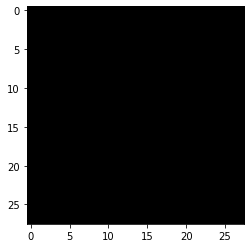

In [28]:
# ex.1 - horizontal detecting
image = 255*np.ones((30,30))
image[:15,:] = 0  #위는 어둡고 아래은 밝음
plt.imshow(image,cmap='gray')
new_image = convolution(image,horizon_k)
plt.imshow(new_image,cmap='gray')

horizon_edge
vertical_edge
tilt_edge
laplacian_edge


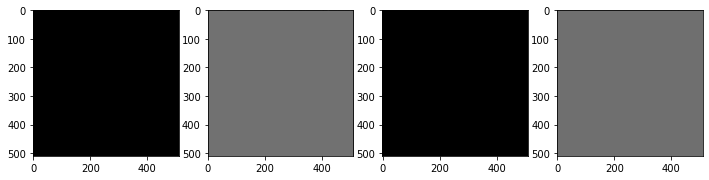

In [29]:
# ex.2 - lena test
filter_set = [horizon_k,vertical_k,tilt_k,laplacian_k]
filter_name = ['horizon_edge','vertical_edge','tilt_edge','laplacian_edge']
image = Image.open('./5-1 Lenna.png').convert('L')

fig = plt.figure(figsize=(12,12))
columns = 4
rows = 1

for idx,filter in enumerate(filter_set):
  print(str(filter_name[idx]))
  new_image = convolution(image,filter)
  fig.add_subplot(rows,columns,idx+1)
  plt.imshow(new_image,cmap='gray')